# Regression from scratch

In [ ]:
def mean(values):
  return(sum(values)/float(len(values)))

In [ ]:
def variance(values,mean):
  return sum((x-mean)**2 for x in values)

In [ ]:
dataset=[1,1],[2,3],[4,3],[3,2],[7,5]
x=[row[0] for row in dataset]
y=[row[1] for row in dataset]
mean_x,mean_y=mean(x),mean(y)
var_x,var_y=variance(x,mean(x)),variance(y,mean(y))
print('mean,variance for x',(mean_x,var_x))
print('mean,variance for y',(mean_y,var_y))

mean,variance for x (3.4, 21.200000000000003)
mean,variance for y (2.8, 8.8)


In [ ]:
def covariance(x,mean_x,y,mean_y):
  covar=0.0
  for i in range(len(x)):
    covar +=((x[i]-mean_x)*(y[i]-mean_y))
  return covar  

In [ ]:
dataset=[1,1],[2,3],[4,3],[3,2],[7,5]
x=[row[0] for row in dataset]
y=[row[1] for row in dataset]
mean_x,mean_y=mean(x),mean(y)
covar=covariance(x,mean_x,y,mean_y)
print('Covariance is',(covar))

Covariance is 12.399999999999999


In [ ]:
def coefficent(dataset):
  x=[row[0] for row in dataset]
  y=[row[1]for row in dataset]
  mean_x,mean_y=mean(x),mean(y)
  b1=covariance(x,mean_x,y,mean_y)/variance(x,mean(x))
  b0=mean_y-b1*mean_x
  return [b0,b1]

In [ ]:
dataset=[1,1],[2,3],[4,3],[3,2],[7,5]
b0,b1=coefficent(dataset)
print('coefficient are',(b0,b1))

coefficient are (0.8113207547169814, 0.5849056603773584)


In [ ]:
def simple_linear_regression(train,test):
  prediction=list()
  b0,b1=coefficent(train)
  for row in test:
    yhat=b0+b1*row[0]
    prediction.append(yhat)
  return prediction  

In [ ]:
from math import sqrt
def rmse(actual,predicted):
  sum_error=0.0
  for i in range(len(actual)):
    predicted_error=predicted[i]-actual[i]
    sum_error=(predicted_error**2)
  mean_error=sum_error/float(len(actual))
  return sqrt(mean_error)  

In [ ]:
def evaluation_algorithm(dataset,algorithm):
  test_set=list()
  for row in dataset:
    row_copy=list(row)
    row_copy[-1]=None#setting the 2nd element in each row to zero to create test set
    test_set.append(row_copy)
  predicted=algorithm(dataset,test_set)
  print(predicted)
  actual=[row[-1] for row in dataset]#accessing the 2nd element of each row to get real output
  rmse1=rmse(actual,predicted)
  return rmse1  

In [ ]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse2=evaluation_algorithm(dataset,simple_linear_regression)
print('RMSE:',(rmse2))

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.268328157299975


Using real Dataset

In [ ]:
from random import seed
from random import randrange
from csv import reader

In [ ]:
def load_csv(filename):
  dataset=list()
  with open(filename,'r') as file:
    csv_reader=reader(file)
    for row in csv_reader:
      if not row:
        continue
      dataset.append(row)
  return dataset      

In [ ]:
def str_column_to_float(dataset,column):
  for row in dataset:
    row[column]=float(row[column].strip())

In [ ]:
def train_test_split(dataset,split):
  train=list()
  train_size=split*len(dataset)
  dataset_copy=list(dataset)
  while len(train)<train_size:
    index=randrange(len(dataset_copy))
    train.append(dataset_copy.pop(index))
  return train,dataset_copy  

In [ ]:
seed(1)
filename='filename.xls'
dataset=load_csv(filename)
for i in range(len(dataset[0])):
  str_column_to_float(dataset,i)
split=0.7
rmse=evaluation_algorithm(filename,simple_linear_regression)
print('RMSE is:',rmse) 

# Linear Regression with sgd

In [ ]:
from random import seed
from random import randrange
from math import sqrt
from csv import reader

In [ ]:
def load_csv(filename):
  wines=list()
  with open(filename,'r') as file:
    csv_reader=reader(file)
    #wines = list(csv_reader(file,delimiter=";")
    for row in csv_reader:
      if not row:
        continue
      dataset.append(row)
  return wines 

In [ ]:
def str_column_to_float(dataset,column):
  for row in dataset:
    row[column]=float(row[column].strip(';'))

In [ ]:
def min_max(dataset):
  minmax=list()
  for i in range(len(dataset[0])-1):
    col_values=[row[i] for row in dataset]
    value_min=min(col_values)
    value_max=max(col_values)
    minmax.append([value_min,value_max])
  return minmax

In [ ]:
def normalize(dataset, minmax):
  for row in dataset:
    for i in range(len(row)):
      row[i]=(row[i]-minmax[i][0])/(minmax[i][1]-minmax[i][0])

In [ ]:
def cross_validation_split(dataset,n_fold):
  dataset_split=list()
  dataset_copy=list(dataset)
  fold_size=int(len(dataset)/n_fold)
  for i in range(n_fold):
    fold=list()
    while len(fold)<fold_size:
      index=randrange(len(dataset_copy))
      fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
  return dataset_split    

In [ ]:
def rmse(actual,predicted):
  sum_error=0.0
  for i in range(len(actual)):
    predicted_error=predicted[i]-actual[i]
    sum_error=(predicted_error**2)
  mean_error=sum_error/float(len(actual))
  return sqrt(mean_error)

In [ ]:
def evaluate_algorithm(dataset,algorithm,n_fold,*args):
  folds=cross_validation_split(dataset,n_fold)
  scores=list()
  for fold in folds:
    train_set=list(folds)
    train_set.remove(fold)
    train_set=sum(train_set,[])
    test_set=list()
    for row in fold:
      row_copy=list(row)
      test_set.append(row_copy)
      row_copy[-1]=None
    predicted=algorithm(train_set,test_set,*args)
    actual=[row[-1]for row in dataset]
    rmse=rmse(actual,predicted)
    scores.append(rmse)
  return scores  

In [ ]:
def predict(row,coeff):
  yhat=coeff[0]
  for i in range(len(row)):
    yhat +=coeff[i+1]*row[i]
  return yhat  

In [ ]:
def coeff_sgd(train,l_rate,n_epoch):
  coef=[0.0 for i in range(len(train[0]))]
  for epoch in range(n_epoch):
    sum_error=0
    for row in train:
      yhat=predict(row,coef)
      error=yhat-row[-1]
      sum_error += error**2
      coef[0]=coef[0]-l_rate*error
      for i in range(len(row)-1):
        coef[i+1]=coef[i+1]-l_rate*error*row[i]
    print('epoch,l_rate,error',(epoch,l_rate,sum_error))
  return coef         

In [ ]:
def linear_regression_sgd(train,test,l_rate,n_epoch):
  prediction=list()
  coef=coeff_sgd(train,l_rate,n_epoch)
  for row in test:
    yhat=predict(row,coef)
    prediction.append(yhat)
  return(prediction)  

In [ ]:
filename='winequality-white.csv'
dataset=load_csv(filename)
for i in range(len(dataset)):
  str_column_to_float(dataset,i)
minmax=min_max(dataset)
normalize(dataset,minmax)
n_folds=5
l_rate=0.01
n_epoch=50
scores=evaluate_algorithm(dataset,linear_regression_sgd,n_folds,l_rate,
                          n_epoch)
print('Scores',scores)
print('Mean RMSE',(sum(scores)/float(len(scores))))  

In [ ]:
import matplotlib.pyplot as plt
dataset=[[1,1],[2,3],[4,3],[3,2],[5,5]]
coeff=[0.4,0.8]
for row in dataset:
  yhat=predict(row,coeff)
  print('Expected,Predicted',(row[-1],yhat))
plt.plot(row[-1],yhat)  

In [ ]:
dataset=[[1,6],[2,7],[4,8],[3,9],[5,10]]
l_rate=0.01
n_epoch=40
coef=coeff_sgd(dataset,l_rate,n_epoch)
#min_maxi=min_max(dataset)
print(coef)
#print(min_maxi)

# Linear Regression using libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def estimate_coef(x,y):
  n=np.size(x)
  m_x,m_y=np.mean(x),np.mean(y)
  Sxy=np.sum(y*x)-n*m_y*m_x
  Sxx=np.sum(x*x)-n*m_x*m_y
  b_1=Sxy/Sxx
  b_0=m_y-b_1*m_x
  return (b_1,b_0)

In [ ]:
def regression_plot_line(x,y,b):
  plt.scatter(x,y,color='b',marker='o',s=30)
  y_pred=b[0]+b[1]*x
  plt.plot(x,y_pred,color='g')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

Estimated coeff is (-12.866666666666667, 64.4)


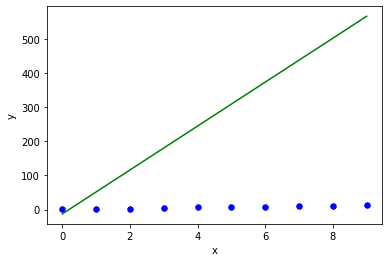

In [ ]:
def main():
  x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
  b=estimate_coef(x,y)
  print('Estimated coeff is',(b[0],b[1]))
  regression_plot_line(x,y,b)
if __name__=="__main__":
  main()

# Linear regression using boston dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,metrics

In [ ]:
boston=datasets.load_boston(return_X_y=False)

In [ ]:
X=boston.data
Y=boston.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,
                                               random_state=1)

In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficient are:',reg.coef_)

Coefficient are: [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]


In [ ]:
print('Variance Score:',reg.score(X_test,Y_test))

Variance Score: 0.7209056672661777


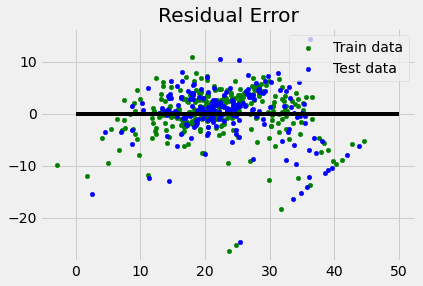

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train),reg.predict(X_train)-Y_train,color='g',
                   s=20,label='Train data')
plt.scatter(reg.predict(X_test),reg.predict(X_test)-Y_test,color='b',
                   s=20,label='Test data')
plt.hlines(y=0,xmin=0,xmax=50,linewidth=4)
plt.legend(loc='upper right')
plt.title('Residual Error')
plt.show()